<a href="https://colab.research.google.com/github/vitorbrandao0/Projeto-VB/blob/main/Projeto_VB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
dados = pd.read_excel('/content/Projeto VB - Dados pacientes.xlsx', sheet_name='Apenas resultado', header=1)

In [6]:
primeira_coluna = dados.columns[0]
dados = dados.drop(columns=[primeira_coluna])

In [8]:
primeira_coluna = dados.columns[0]
dados = dados.drop(columns=[primeira_coluna])

In [9]:
dados

,HD Graduando,HD Residente,Resultado Gram,Unnamed: 5,2 - Flora II
0,1,1,7,NaN,3 - Flora II e candidíase (ou apenas CVV)
1,1,1,4,NaN,4 - VB
2,2,4,5,NaN,5 - Ausência de microbiota vaginal
3,1,1,1,NaN,6 - Vaginose citolítica
4,3,3,6,NaN,7 - Vaginite aeróbia
...,...,...,...,...,...
99,1,0,1,NaN,NaN
100,2,0,4,NaN,NaN
101,4,0,7,NaN,NaN
102,2,0,1,NaN,NaN


In [10]:
primeira_coluna = dados.columns[3]
dados = dados.drop(columns=[primeira_coluna])

In [11]:
dados

,HD Graduando,HD Residente,Resultado Gram,2 - Flora II
0,1,1,7,3 - Flora II e candidíase (ou apenas CVV)
1,1,1,4,4 - VB
2,2,4,5,5 - Ausência de microbiota vaginal
3,1,1,1,6 - Vaginose citolítica
4,3,3,6,7 - Vaginite aeróbia
...,...,...,...,...
99,1,0,1,NaN
100,2,0,4,NaN
101,4,0,7,NaN
102,2,0,1,NaN


In [12]:
primeira_coluna = dados.columns[3]
dados = dados.drop(columns=[primeira_coluna])

In [13]:
dados
dados = dados.rename(columns={'HD Graduando': 'HDG', 'HD Residente': 'HDR', 'Resultado Gram': 'Gram'})

In [14]:
dados

,HDG,HDR,Gram
0,1,1,7
1,1,1,4
2,2,4,5
3,1,1,1
4,3,3,6
...,...,...,...
99,1,0,1
100,2,0,4
101,4,0,7
102,2,0,1


In [15]:
colunas = dados.columns

In [16]:
colunas

Index(['HDG', 'HDR', 'Gram'], dtype='object')

In [17]:
similarity_percentages = {}

for col1_index in range(len(colunas)):
    for col2_index in range(col1_index + 1, len(colunas)):
        col1 = colunas[col1_index]
        col2 = colunas[col2_index]

        matches = (dados[col1] == dados[col2]).sum()

        total_rows = len(dados)
        similarity_percentage = (matches / total_rows) * 100

        similarity_percentages[(col1, col2)] = similarity_percentage

print(f"Similaridade entre os resultados: ")
for pair, percentage in similarity_percentages.items():
    print(f"'{pair[0]}' and '{pair[1]}': {percentage:.2f}%")

Similaridade entre os resultados: 
'HDG' and 'HDR': 41.35%
'HDG' and 'Gram': 37.50%
'HDR' and 'Gram': 27.88%


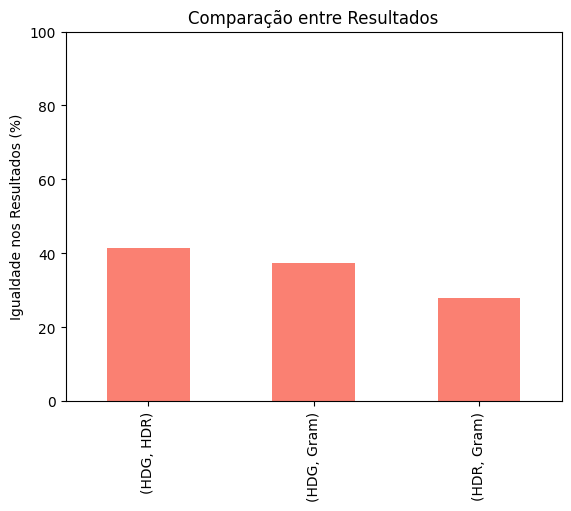

In [18]:
import matplotlib.pyplot as plt

# Assuming similarity_percentages dictionary is already calculated

similarity_series = pd.Series(similarity_percentages)

similarity_series.plot(kind='bar', color = 'salmon')

new_labels = [f"{pair[0]} & {pair[1]}" for pair in similarity_series.index]
similarity_series.index = new_labels

plt.ylabel("Igualdade nos Resultados (%)")
plt.title("Comparação entre Resultados")


plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100

plt.show()